# Exercise 1: Linear Regression and Deep Neuron Network (DNN)
### Vincent G.


In [50]:
# # Retrieve dataset
# !curl -O archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data

# # Tested on Ubuntu WSL
# !lsb_release -a

# # Install needed packages from PyPI
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install seaborn
# !{sys.executable} -m pip install keras
# !{sys.executable} -m pip install tensorflow
# !{sys.executable} -m pip install matplotlib

# For Markdown formatting during display
from IPython.display import Markdown


## 🟢 1.1 : Download dataset (done above using `curl`)
## 🟢 1.2 : Read data with pandas 

In [51]:
import pandas as pd
import numpy as np

columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']

features = [c for c in columns if c != 'mpg'] # columns but without target
target = ['mpg']

print(f'{features = }')
print(f'{target = }')

df = pd.read_csv(
    filepath_or_buffer='auto-mpg.data',
    delim_whitespace=True,
    names=columns
)

shape_before_dropna = df.shape

features = ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
target = ['mpg']


## 🟢 1.3 : Clean data by removing unknown values and unused attributes


In [52]:
df.replace('?', np.nan, inplace=True)
df.dropna(how='any', inplace=True)

shape_after_dropna = df.shape

display(Markdown(
    f"""Shape before `dropna` : {shape_before_dropna} \n\n Shape before `dropna` : {shape_after_dropna}"""
    f"""\n\n ### Note : we lost {shape_before_dropna[0] - shape_after_dropna[0]} rows, which isn't much."""
))

# clean data by removing attributes that won't be of any use
df.drop('car_name', axis=1, inplace=True)
features.remove('car_name') # also remove it from the feature list as it will be used later when defining X

Shape before `dropna` : (398, 9) 

 Shape before `dropna` : (392, 9)

 ### Note : we lost 6 rows, which isn't much.

## 🟢 1.4 Visualize the data

In [53]:
display(Markdown('## dataframe head and tail'))
display(df.head(), df.tail())

display(Markdown('## dataframe .describe()'))
display(df.describe())

## dataframe head and tail

mpg  cylinders  displacement horsepower  weight  acceleration  model_year  \
0  18.0          8         307.0      130.0  3504.0          12.0          70   
1  15.0          8         350.0      165.0  3693.0          11.5          70   
2  18.0          8         318.0      150.0  3436.0          11.0          70   
3  16.0          8         304.0      150.0  3433.0          12.0          70   
4  17.0          8         302.0      140.0  3449.0          10.5          70   

   origin  
0       1  
1       1  
2       1  
3       1  
4       1

mpg  cylinders  displacement horsepower  weight  acceleration  \
393  27.0          4         140.0      86.00  2790.0          15.6   
394  44.0          4          97.0      52.00  2130.0          24.6   
395  32.0          4         135.0      84.00  2295.0          11.6   
396  28.0          4         120.0      79.00  2625.0          18.6   
397  31.0          4         119.0      82.00  2720.0          19.4   

     model_year  origin  
393          82       1  
394          82       2  
395          82       1  
396          82       1  
397          82       1

## dataframe .describe()

mpg   cylinders  displacement       weight  acceleration  \
count  392.000000  392.000000    392.000000   392.000000    392.000000   
mean    23.445918    5.471939    194.411990  2977.584184     15.541327   
std      7.805007    1.705783    104.644004   849.402560      2.758864   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.000000    4.000000    105.000000  2225.250000     13.775000   
50%     22.750000    4.000000    151.000000  2803.500000     15.500000   
75%     29.000000    8.000000    275.750000  3614.750000     17.025000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model_year      origin  
count  392.000000  392.000000  
mean    75.979592    1.576531  
std      3.683737    0.805518  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000

## Visualizing the MPG attribute

<AxesSubplot:title={'center':'density of the mpg feature'}, ylabel='Frequency'>

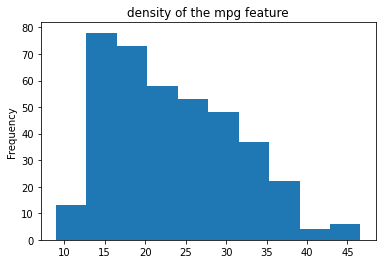

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

display(
    Markdown('## Visualizing the MPG attribute'),
    df.mpg.plot(kind='hist', title='density of the mpg feature'),
)

## Visualizing the origin attribute

<AxesSubplot:ylabel='origin'>

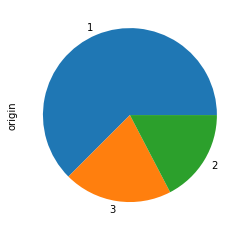

In [55]:
display(
    Markdown('## Visualizing the origin attribute'),
    df.origin.value_counts().plot(kind='pie'),
)

## Visualize relationships between attributes using Seaborn's `pairplot` ...

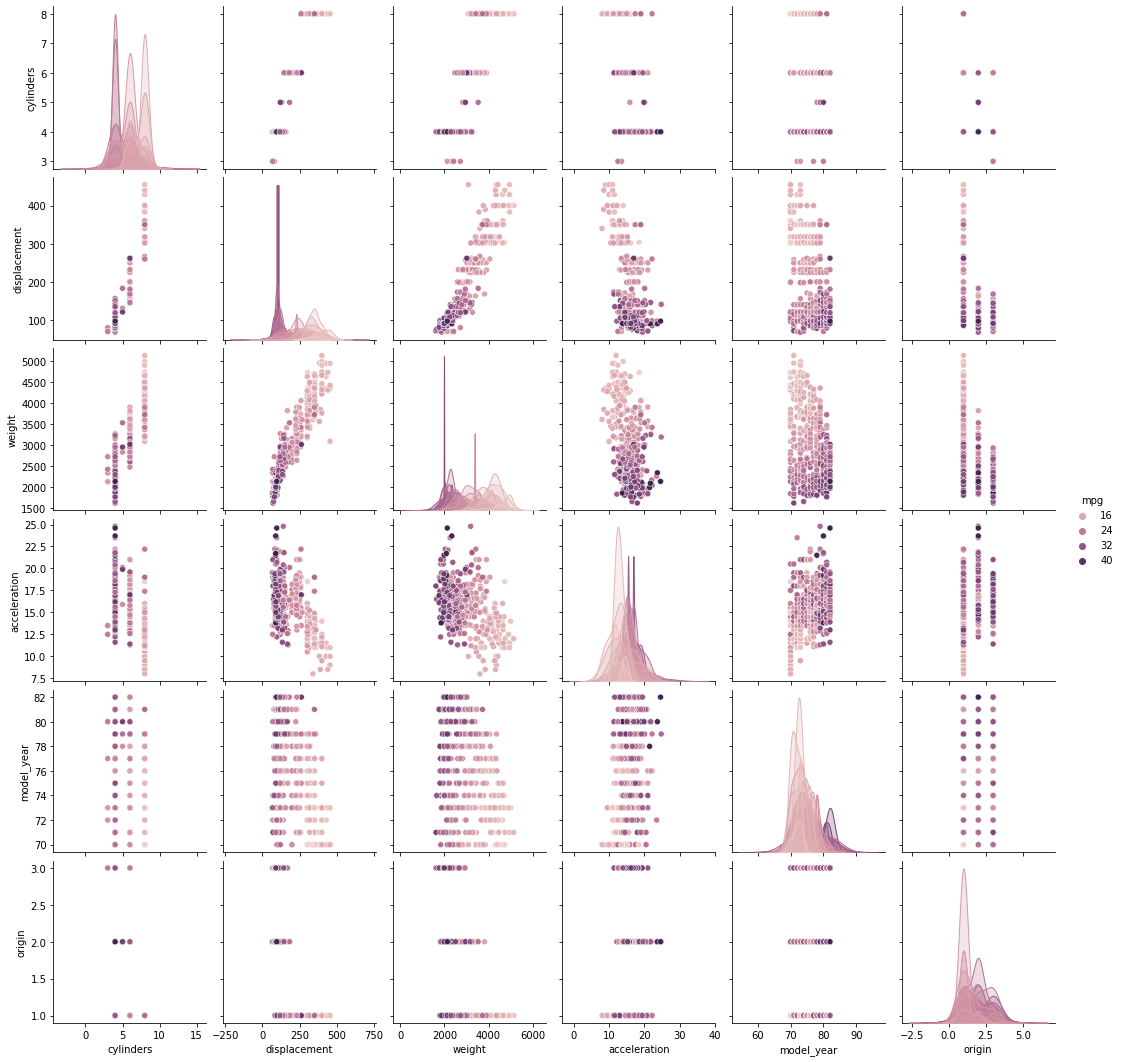

In [56]:
# using Seaborn's pairplot
display(Markdown('## Visualize relationships between attributes using Seaborn\'s `pairplot` ...'))

# the following line should be uncommented
sns.pairplot(df, hue='mpg')

## ... and using a heatmap.

<AxesSubplot:>

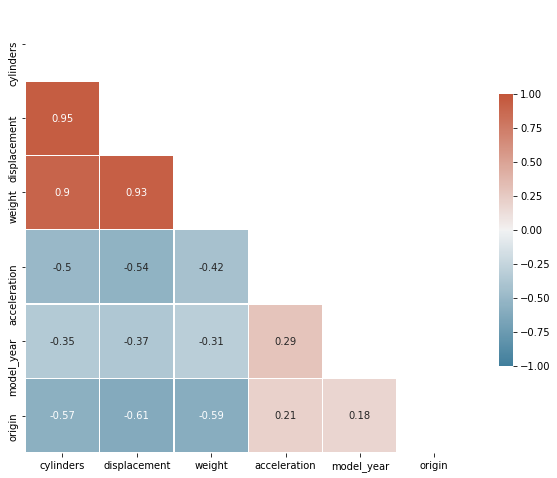

In [57]:
# Using a heatmap
# (Code from the Seaborn documentation https://seaborn.pydata.org/examples/many_pairwise_correlations.html)
display(Markdown('## ... and using a heatmap.'))

# Compute the correlation matrix
corr = df.loc[:, df.columns != 'mpg'].corr().round(2)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

## By taking a look at the heatmap, the highest correlations are between:
-   `cylinders` and `weight`
-   `cylinders` and `displacement`
-   `displacement` and `weight`

## 🟢 1.5 Divide the data into a training set and a test set (80% training, 20% test).

In [58]:
from sklearn.model_selection import train_test_split

X = df[features]
y = df[target]

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.20, random_state=0)

## 🟢 1.6 Normalize the data

In [59]:
from sklearn.preprocessing import Normalizer

# Normalizer documentation :
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html


display(Markdown('### before normalizing'), train_X.head())

transformer = Normalizer().fit(X) # fit doesn't affect the data
train_X = pd.DataFrame(transformer.transform(train_X), columns=features)
val_X = pd.DataFrame(transformer.transform(val_X), columns=features)

display(Markdown('### after normalizing'), train_X.head())

### before normalizing

cylinders  displacement horsepower  weight  acceleration  model_year  \
220          4          85.0      70.00  1945.0          16.8          77   
256          6         225.0      100.0  3430.0          17.2          78   
301          4         105.0      70.00  2200.0          13.2          79   
193          6         200.0      81.00  3012.0          17.6          76   
57           4         113.0      95.00  2278.0          15.5          72   

     origin  
220       3  
256       1  
301       1  
193       1  
57        3

### after normalizing

cylinders  displacement  horsepower    weight  acceleration  model_year  \
0   0.002052      0.043596    0.035903  0.997582      0.008617    0.039493   
1   0.001744      0.065412    0.029072  0.997163      0.005000    0.022676   
2   0.001814      0.047617    0.031745  0.997698      0.005986    0.035826   
3   0.001986      0.066209    0.026815  0.997109      0.005826    0.025159   
4   0.001751      0.049475    0.041594  0.997385      0.006786    0.031524   

     origin  
0  0.001539  
1  0.000291  
2  0.000453  
3  0.000331  
4  0.001314

## 🟢 1.7.1 Train a linear regression model first ...

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Define model (LinReg)
model = LinearRegression()

# Fit model (capture patterns in the data)
model.fit(train_X, train_y)

# get predicted mpg on validation data
val_predictions = model.predict(val_X)

# print mean_absolute_error
val_mae_linear_regression = mean_absolute_error(val_y, val_predictions)

display(Markdown('### Using linear regression, we obtain a **Mean Absolute Error** of'))
display(Markdown(f'## `{val_mae_linear_regression:.4f}`'))
display(Markdown(f'( not rounded : `{val_mae_linear_regression}`)'))
display(Markdown('### It seems pretty good.'))

### Using linear regression, we obtain a **Mean Absolute Error** of

## `2.3598`

( not rounded : `2.359844992795159`)

### It seems pretty good.

## 🟢 1.7.2 then train a Deep Neuron Network with two dense layers of 64 neurons with relu activation functions.

In [61]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.losses import MeanSquaredError, MeanAbsoluteError

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.20, random_state=0)

In [66]:
# apply feature scaling
# sc = StandardScaler()
# train_X = sc.fit_transform(train_X)
# val_X = sc.transform(val_X)

# normalize
transformer = Normalizer().fit(X) # fit doesn't affect the data
train_X = pd.DataFrame(transformer.transform(train_X), columns=features)
val_X = pd.DataFrame(transformer.transform(val_X), columns=features)

model = Sequential()

# Adding the input layer and the first hidden layer
#        the second hidden layer
#        the output layer

model.add(Dense(units=64, kernel_initializer='uniform', activation='relu', input_dim=7))
model.add(Dense(units=64, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='selu')) #relu, elu, softplus, selu ...


adam_opt = Adam(learning_rate=0.1) # https://keras.io/api/optimizers/
mae_loss = MeanAbsoluteError(reduction="auto", name="mean_absolute_error")
mse_loss = MeanSquaredError(reduction="auto", name="mean_squared_error")

# compile ("Configures the model for training")
# model.compile(optimizer=adam_opt, loss=mae_loss) #mectrics=[]
model.compile(optimizer=adam_opt, loss=mse_loss) #mectrics=[]

display(Markdown('### *Note : The results seems to be better with the MeanSquaredError function.*'))

# Fitting the model to the Training set
model.fit(train_X, train_y, batch_size=10, epochs=100, verbose=1)

### *Note : The results seems to be better with the MeanSquaredError function.*

Epoch 1/100
32/32 [==============================] - 0s 715us/step - loss: 122.1123
Epoch 2/100
32/32 [==============================] - 0s 751us/step - loss: 65.6583
Epoch 3/100
32/32 [==============================] - 0s 790us/step - loss: 44.1284
Epoch 4/100
32/32 [==============================] - 0s 845us/step - loss: 28.4146
Epoch 5/100
32/32 [==============================] - 0s 780us/step - loss: 20.7292
Epoch 6/100
32/32 [==============================] - 0s 811us/step - loss: 32.3672
Epoch 7/100
32/32 [==============================] - 0s 888us/step - loss: 23.3537
Epoch 8/100
32/32 [==============================] - 0s 1ms/step - loss: 21.9735
Epoch 9/100
32/32 [==============================] - 0s 875us/step - loss: 22.3402
Epoch 10/100
32/32 [==============================] - 0s 1ms/step - loss: 24.2606
Epoch 11/100
32/32 [==============================] - 0s 1ms/step - loss: 18.8045
Epoch 12/100
32/32 [==============================] - 0s 979us/step - loss: 15.9171
Epoch 

In [67]:
# Predicting the Test set results
val_predictions = model.predict(val_X)

val_mae_mlp = mean_absolute_error(val_y, val_predictions)

display(Markdown('### Using a Multilayer Preceptron, we obtain a **Mean Absolute Error** of'))
display(Markdown(f'## `{val_mae_mlp:.4f}`'))
display(Markdown(f'(not rounded : `{val_mae_mlp}`)'))

### Using a Multilayer Preceptron, we obtain a **Mean Absolute Error** of

## `2.6061`

(not rounded : `2.6060986917230147`)

## 🟢 1.8 : Compare the results of the two models (linear regression and MLP) on the test set.
### The MLP results are pretty good, but the result of the Linear Regression model is still better.